In [2]:
### SETUP
import matplotlib.pyplot as plt
import csv

Plotted 10 points from attribution pruning data


<Axes: title={'center': 'Total Hidden Neurons vs Datapoints on MNIST Even Digits'}, xlabel='Total Hidden Neurons', ylabel='Datapoints'>

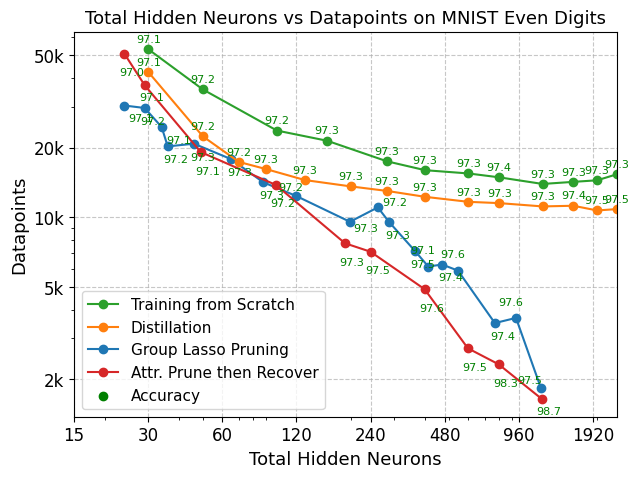

In [6]:
### VISUALIZING DATA FOR PRUNING, DISTILLATION, AND TRAINING FROM SCRATCH

def load_accuracies_by_neurons(filepath):
    """Load data from a CSV file with columns Active Neurons, Beta, Accuracy, etc."""
    data = []
    with open(filepath, mode='r', newline='') as file:
        reader = csv.DictReader(file)
        for row in reader:
            active_neurons = int(float(row['Active Neurons']))
            beta = float(row['Beta'])
            accuracy = float(row['Accuracy'])
            epoch = float(row['Epoch'])
            datapoints = float(row['Datapoints'])
            pruning_penalty = row.get('Pruning Penalty', 'N/A')
            
            data.append({
                'Active Neurons': active_neurons,
                'Beta': beta,
                'Accuracy': accuracy,
                'Epoch': epoch,
                'Datapoints': datapoints,
                'Pruning Penalty': pruning_penalty
            })
    return data


def plot_datapoints_vs_neurons_with_accuracy_labels(data, csv_filepath, second_filepath, attribution_filepath=None, ax=None):
    """Plot Datapoints versus Neurons Remaining, with points labeled by Accuracy."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 5))
    
    colors = {
        'pruning': '#1f77b4',         # Blue
        'training_from_scratch': '#2ca02c',  # Green 
        'distillation': '#ff7f0e',    # Orange
        'prune_then_recover': '#d62728'  # Red
    }
    
    # Sort the pruning data to ensure that the points are connected with one continuous trendline.
    sorted_data = sorted(data, key=lambda d: -d['Active Neurons'])
    pruning_neurons_remaining = [d['Active Neurons'] for d in sorted_data]
    pruning_datapoints = [d['Datapoints'] for d in sorted_data]
    pruning_accuracies = [d['Accuracy'] for d in sorted_data]
    
    # Plot the pruning data using one continuous trendline.
    ax.plot(pruning_neurons_remaining, pruning_datapoints, 'o-', label='Group Lasso Pruning', color=colors['pruning'])
    for i, (x, y, acc) in enumerate(zip(pruning_neurons_remaining, pruning_datapoints, pruning_accuracies)):
        # Hardcoded accuracy label locations (to clean up the graph)
        if i < 7 and i!=0: 
            if i % 2 == 0:
                ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(6, -6), 
                           ha='center', va='top', color='green', fontsize=8)
            else:
                ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(-4, 15), 
                           ha='center', va='top', color='green', fontsize=8)
        elif i==7:
            ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(6, -6), ha='center', va='top', color='green', fontsize=8)
        elif i==8:
            ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(12, 7), ha='center', va='top', color='green', fontsize=8)
        elif i==9:
            ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(11, -1), ha='center', va='top', color='green', fontsize=8)
        elif i==len(pruning_neurons_remaining)-1:
            ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(12, -6), ha='center', va='top', color='green', fontsize=8)
        elif i==len(pruning_neurons_remaining)-3:
            ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(12, -6), ha='center', va='top', color='green', fontsize=8)
        elif i == 0:
            ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(-8, 9), ha='center', va='top', color='green', fontsize=8)
        elif i==10:
            ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(-4, 10), ha='center', va='top', color='green', fontsize=8)
        else:
            ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(6, -6), ha='center', va='top', color='green', fontsize=8)
    
    # Load and plot data from the first CSV (training from scratch)
    with open(csv_filepath, mode='r') as file:
        reader = csv.DictReader(file)
        rows = list(reader)
        csv_datapoints = []
        csv_neurons_remaining = []
        csv_accuracies = []
        for row in rows:
            csv_datapoints.append(float(row['Datapoints']))
            csv_neurons_remaining.append(int(row['Neurons Remaining']))
            csv_accuracies.append(float(row['Accuracy']))
    
    ax.plot(csv_neurons_remaining, csv_datapoints, 'o-', label='Training from Scratch', color=colors['training_from_scratch'])
    for x, y, acc in zip(csv_neurons_remaining, csv_datapoints, csv_accuracies):
        ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='green', fontsize=8)
    
    # Load and plot data from the second CSV (Hinton Distillation)
    with open(second_filepath, mode='r') as file:
        reader = csv.DictReader(file)
        rows = list(reader)
        csv_datapoints = []
        csv_neurons_remaining = []
        csv_accuracies = []
        for row in rows:
            if 'Datapoints' in row:
                csv_datapoints.append(float(row['Datapoints']))
            csv_neurons_remaining.append(int(row['Neurons Remaining']))
            csv_accuracies.append(float(row['Accuracy']))

    ax.plot(csv_neurons_remaining, csv_datapoints, 'o-', label='Distillation', color=colors['distillation'])
    for x, y, acc in zip(csv_neurons_remaining, csv_datapoints, csv_accuracies):
        ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='green', fontsize=8)
    
    # Load and plot data from the attribution pruning CSV
    if attribution_filepath:
        try:
            with open(attribution_filepath, mode='r') as file:
                reader = csv.DictReader(file)
                rows = list(reader)
                attribution_datapoints = []
                attribution_neurons = []
                attribution_accuracies = []
                for row in rows:
                    attribution_datapoints.append(float(row['Datapoints']))
                    attribution_neurons.append(int(row['Active Neurons']))
                    attribution_accuracies.append(float(row['Accuracy']))
            
            # Sort by neurons to ensure proper line ordering
            sorted_indices = sorted(range(len(attribution_neurons)), key=lambda i: -attribution_neurons[i])
            attribution_neurons = [attribution_neurons[i] for i in sorted_indices]
            attribution_datapoints = [attribution_datapoints[i] for i in sorted_indices]
            attribution_accuracies = [attribution_accuracies[i] for i in sorted_indices]
            
            ax.plot(attribution_neurons, attribution_datapoints, 'o-', label='Attr. Prune then Recover', color=colors['prune_then_recover'])
            
            # Place the accuracy labels
            for i, (x, y, acc) in enumerate(zip(attribution_neurons, attribution_datapoints, attribution_accuracies)):
                if i==0:
                    ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(5, -5), ha='center', va='top', color='green', fontsize=8)
                elif i==len(attribution_neurons)-2:
                    ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(5, -5), ha='center', va='top', color='green', fontsize=8)
                else:
                    ax.annotate(f'{acc:.1f}', (x, y), textcoords="offset points", xytext=(5, -10), ha='center', va='top', color='green', fontsize=8)

            print(f"Plotted {len(attribution_neurons)} points from attribution pruning data")
        except Exception as e:
            print(f"Error loading attribution pruning data: {e}")

    # Axis labels and scales (note the axes are flipped)
    ax.set_xlabel('Total Hidden Neurons', fontsize=13)
    ax.set_ylabel('Datapoints', fontsize=13)
    ax.set_xscale('log')
    ax.set_yscale('log')
    min_x = 15 
    
    # Calculate max_x considering all data sources
    max_neuron_values = [max(pruning_neurons_remaining), max(csv_neurons_remaining)]
    if attribution_filepath and 'attribution_neurons' in locals() and attribution_neurons:
        max_neuron_values.append(max(attribution_neurons))
    max_x = max(max_neuron_values)
    
    ax.set_xlim(min_x, max(max_x, 1100))
    
    import matplotlib.ticker as ticker
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.xaxis.set_major_locator(ticker.FixedLocator([15, 30, 60, 120, 240, 480, 960, 1920]))
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    y_values = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.yaxis.set_major_locator(ticker.FixedLocator(y_values))
    ax.yaxis.get_major_formatter().set_scientific(False)
    
    def y_fmt(x, pos):
        if x >= 1000000:
            return f'{x/1000000:.0f}M'
        elif x >= 1000:
            return f'{x/1000:.0f}k'
        else:
            return f'{x:.0f}'
    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    
    ax.set_title('Total Hidden Neurons vs Datapoints on MNIST Even Digits', fontsize=13)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.scatter([], [], color='green', label='Accuracy')
    
    # Create a list of handles and labels from the current legend
    handles, labels = ax.get_legend_handles_labels()
    
    # Define the desired order
    desired_order = [
        'Training from Scratch',
        'Distillation', 
        'Group Lasso Pruning',
        'Attr. Prune then Recover',
        'Accuracy'
    ]
    
    # Reorder the handles and labels
    ordered_handles = []
    ordered_labels = []
    for label in desired_order:
        if label in labels:
            idx = labels.index(label)
            ordered_handles.append(handles[idx])
            ordered_labels.append(labels[idx])
    
    ax.legend(ordered_handles, ordered_labels, loc='lower left', fontsize=11)
        
    return ax

data = load_accuracies_by_neurons("/afs/csail.mit.edu/u/a/asher/narrow/mnist/data/pruning.csv")
trained_from_scratch =  "/afs/csail.mit.edu/u/a/asher/narrow/mnist/data/training_accuracies_updated.csv"
hinton_csv = "/afs/csail.mit.edu/u/a/asher/narrow/mnist/data/student_training_accuracies.csv"
attribution_csv = "/afs/csail.mit.edu/u/a/asher/narrow/mnist/data/attribution_pruning.csv"
plot_datapoints_vs_neurons_with_accuracy_labels(data, trained_from_scratch, hinton_csv, attribution_csv)

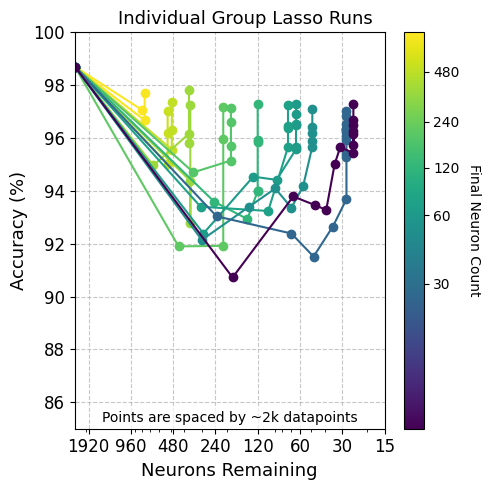

<Axes: title={'center': 'Individual Group Lasso Runs'}, xlabel='Neurons Remaining', ylabel='Accuracy (%)'>

In [7]:
def load_pruning_checkpoints_from_json(filepath):
    """Load pruning checkpoint data from a JSON file."""
    import json
    
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    return data

def plot_pruning_accuracy_vs_neurons(json_filepath, ax=None):
    """Plot each pruning run's accuracy vs neurons remaining with viridis colormap"""
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import matplotlib.cm as cm
    import numpy as np
    import json
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))
        standalone = True
    else:
        standalone = False
    
    # Load the pruning checkpoints data
    pruning_runs = load_pruning_checkpoints_from_json(json_filepath)
    
    # Sort runs by final active neurons (highest to lowest)
    pruning_runs = sorted(pruning_runs, key=lambda run: run["metadata"]["final_active_neurons"], reverse=True)
    
    # Get final active neurons for color mapping
    final_neurons_list = [run["metadata"]["final_active_neurons"] for run in pruning_runs]
    
    # Create a normalized color map based on final neurons
    from matplotlib.colors import PowerNorm
    # Use PowerNorm with gamma < 1 to emphasize differences in lower values
    norm = PowerNorm(gamma=0.2, vmin=min(final_neurons_list), vmax=max(final_neurons_list))
    cmap = cm.viridis
    
    # Store line objects for legend
    lines = []
    
    # Plot each run as a separate line
    for i, run in enumerate(pruning_runs):
        final_neurons = run["metadata"]["final_active_neurons"]
        checkpoints = run["checkpoints"]
        
        # Sort checkpoints by active_neurons to ensure proper line connectivity
        checkpoints = sorted(checkpoints, key=lambda x: x["active_neurons"], reverse=True)
        
        # Extract data for plotting
        active_neurons = [checkpoint["active_neurons"] for checkpoint in checkpoints]
        accuracies = [checkpoint["accuracy"] for checkpoint in checkpoints]
        datapoints = [checkpoint["datapoints"] for checkpoint in checkpoints]
        
        # Add the starting point at (2400, 98.7) for the original teacher model that each run starts with
        active_neurons.insert(0, 2400)
        accuracies.insert(0, 98.7)
        datapoints.insert(0, 100)
        
        # Get color from colormap based on final neurons
        color = cmap(norm(final_neurons))
        
        # Plot the line for this run
        line, = ax.plot(active_neurons, accuracies, 'o-', color=color)
        lines.append(line)
    
    # Axis labels and scales
    ax.set_xlabel('Neurons Remaining', fontsize=13)
    ax.set_ylabel('Accuracy (%)', fontsize=13)
    
    # Configure axes
    ax.set_xscale('log') 
    
    # Set axis limits
    min_x = 15 
    all_neurons = [checkpoint["active_neurons"] for run in pruning_runs for checkpoint in run["checkpoints"]]
    max_x = max(max(all_neurons), 2400)
    ax.set_xlim(min_x, max_x)
    
    ax.set_ylim(85, 100)
    
    # Configure x-axis ticks
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.xaxis.set_major_locator(ticker.FixedLocator([15, 30, 60, 120, 240, 480, 960, 1920]))
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Add title and grid
    ax.set_title('Individual Group Lasso Runs', fontsize=13, x=0.55)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add colorbar for final neurons
    if standalone:
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
        cbar.set_label('Final Neuron Count', rotation=270, labelpad=15)
    else:
        # For the combined plot, create the colorbar differently
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
        cbar.set_label('Final Neuron Count', rotation=270, labelpad=15, fontsize=12)

    # Set custom ticks based on the range of final neurons
    # Calculate appropriate tick values based on min and max of final neurons
    min_neurons = min(final_neurons_list)
    max_neurons = max(final_neurons_list)
    tick_values = []
    for value in [15, 30, 60, 120, 240, 480, 960]:
        if min_neurons <= value <= max_neurons:
            tick_values.append(value)
    
    if tick_values:
        cbar.set_ticks(tick_values)
        cbar.set_ticklabels([str(x) for x in tick_values])

    # Invert x-axis to show decreasing neurons
    ax.invert_xaxis()
    
    ax.text(
        0.5, 0.01,
        "Points are spaced by ~2k datapoints",
        horizontalalignment='center',
        verticalalignment='bottom',
        transform=ax.transAxes,
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=3)
    )
    if standalone:
        plt.tight_layout()
        plt.show()

    return ax
    
plot_pruning_accuracy_vs_neurons("/afs/csail.mit.edu/u/a/asher/narrow/mnist/data/pruning_checkpoints.json")

Plotted 10 points from attribution pruning data


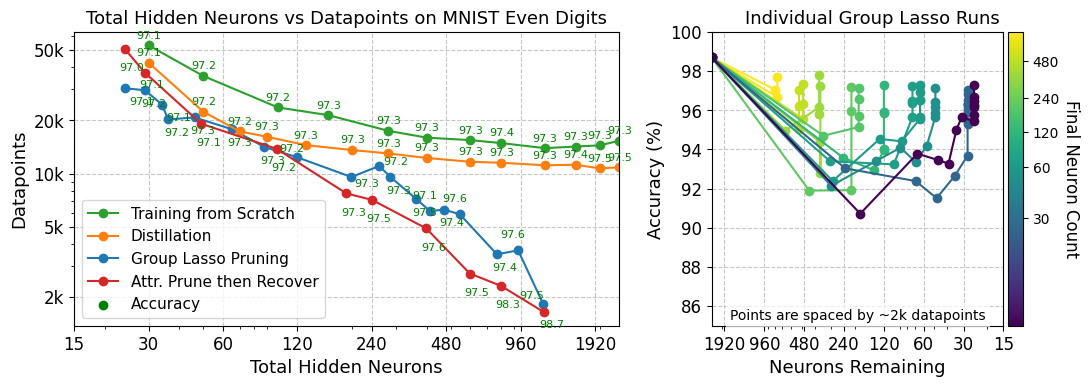

In [8]:
def combined_comparison_plot():
    """Combine both plots side by side in one figure"""
    import matplotlib.pyplot as plt
    
    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4), gridspec_kw={'width_ratios': [3.5, 2]})
    
    # Generate the left subplot - Neurons vs Datapoints with all methods
    data = load_accuracies_by_neurons("/afs/csail.mit.edu/u/a/asher/narrow/mnist/data/pruning.csv")
    trained_from_scratch = "/afs/csail.mit.edu/u/a/asher/narrow/mnist/data/training_accuracies_updated.csv"
    hinton_csv = "/afs/csail.mit.edu/u/a/asher/narrow/mnist/data/student_training_accuracies.csv"
    plot_datapoints_vs_neurons_with_accuracy_labels(data, trained_from_scratch, hinton_csv, attribution_csv, ax=ax1)
    
    # Generate the right subplot - Neurons vs Accuracy for individual pruning runs
    plot_pruning_accuracy_vs_neurons("/afs/csail.mit.edu/u/a/asher/narrow/mnist/data/pruning_checkpoints.json", ax=ax2)
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    
    plt.show()

combined_comparison_plot()